In [7]:
import pandas as pd
import numpy as np

from fit_adversarial import fit_adversarial_regressor, test_model
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("all_vals_race1_interestrate1.csv")
from sklearn.model_selection import train_test_split

df.drop(
    columns=[
        "IsTestData",
        "IsCalibrateData",
        "v1",
        "istestdata2",
        "iscalibratedata2",
    ],
    inplace=True,
)


df["minority"] = (
    (df["race_dum_Black"] == 1)
    | (df["race_dum_Native Am, Alaska, Hawaii"] == 1)
    | (df["race_dum_White hisp"] == 1)
)

C:\Users\bencu\AppData\Local\Temp\ipykernel_33164\3910315459.py:7: DtypeWarning: Columns (101) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("all_vals_race1_interestrate1.csv")


In [8]:
race_columns = [
    "race_dum_Unknown",
    "race_dum_Asian",
    "race_dum_Black",
    "race_dum_Native Am, Alaska, Hawaii",
    "race_dum_White hisp",
    "race_dum_White_non_hisp",
]

ethnicity_column = "ethnicity_dum_hisp"

features = df.drop(
    columns=["default", "cur_int_rate", "sato", "default_age"] + race_columns + [ethnicity_column],
    axis=1,
)

target = df["default"]


sensitive_features = df[["minority"]].values

In [9]:
import math

features = features.applymap(
    lambda x: x if isinstance(x, (int, float)) and not math.isnan(x) else 0
)

C:\Users\bencu\AppData\Local\Temp\ipykernel_33164\2393365648.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  features = features.applymap(


In [10]:
X_train, X_val, y_train, y_val, sensitive_train, sensitive_val = train_test_split(
    features, target, sensitive_features, test_size=0.3, random_state=42
)

In [11]:
mitigator0, scaler0 = fit_adversarial_regressor(
    alpha=0,
    X_train=X_train,
    X_val=X_val,
    y_train=y_train,
    y_val=y_val,
    sensitive_train=sensitive_train,
    sensitive_val=sensitive_val,
    filename="models/alpha0.pkl",
    epochs=12,
    use_skip_connections=False,
    is_regression=False
)

Epoch 1/12, Average adversary loss: 0.496039. Average predictor loss: 0.198336
Current alpha 0, learning_rate 0.001
Validation - Epoch 1/12, Adversary Loss: 5.174259, Predictor Loss: 1.543646
Epoch 2/12, Average adversary loss: 0.495646. Average predictor loss: 0.191878
Current alpha 0, learning_rate 0.001
Validation - Epoch 2/12, Adversary Loss: 5.086466, Predictor Loss: 1.542503
Epoch 3/12, Average adversary loss: 0.497410. Average predictor loss: 0.192318
Current alpha 0, learning_rate 0.001
Validation - Epoch 3/12, Adversary Loss: 5.028863, Predictor Loss: 1.557306
Epoch 4/12, Average adversary loss: 0.492549. Average predictor loss: 0.189750
Current alpha 0, learning_rate 0.001
Validation - Epoch 4/12, Adversary Loss: 5.012181, Predictor Loss: 1.551282
Epoch 5/12, Average adversary loss: 0.497466. Average predictor loss: 0.190316
Current alpha 0, learning_rate 0.001
Validation - Epoch 5/12, Adversary Loss: 4.977830, Predictor Loss: 1.550731
Epoch 6/12, Average adversary loss: 0.49

Prediction probabilities: [0.01228814 0.00642973 0.01442275 0.01575206 0.4383524 ]
Prediction labels: [0 0 0 0 0]
Accuracy: 0.9366
Precision: 0.6116
ROC AUC: 0.8429
Confusion Matrix:
[[1213864    1016]
 [  81203    1600]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97   1214880
           1       0.61      0.02      0.04     82803

    accuracy                           0.94   1297683
   macro avg       0.77      0.51      0.50   1297683
weighted avg       0.92      0.94      0.91   1297683

{'mean_metrics': {'independence': 0.011060292954735812, 'separation': 0.007226724498214705, 'sufficiency': 0.001112855737548138}, 'std_metrics': {'independence': 7.346731940923502e-05, 'separation': 5.99677598628704e-05, 'sufficiency': 2.2018914658379247e-05}}


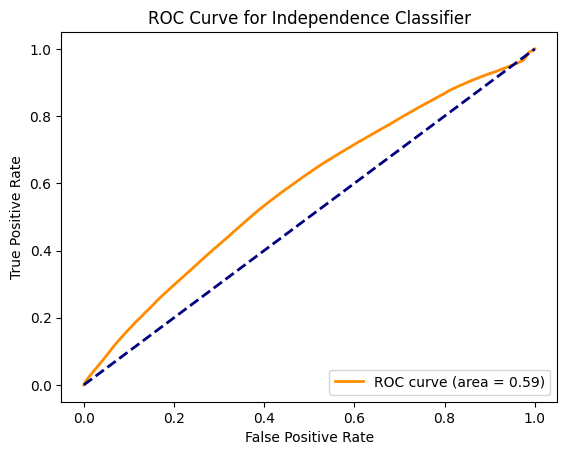

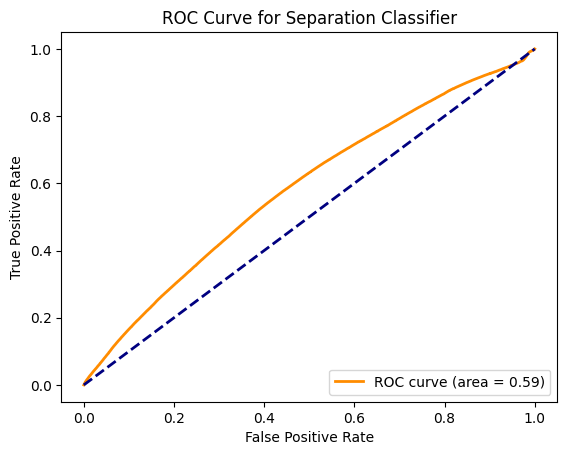

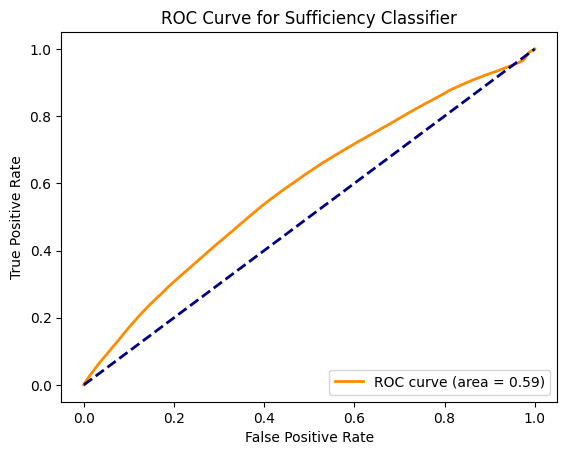

{'accuracy': 0.9366416913837972,
 'precision': 0.6116207951070336,
 'roc_auc': 0.8429320158075085,
 'confusion_matrix': array([[1213864,    1016],
        [  81203,    1600]], dtype=int64),
 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.94      1.00      0.97   1214880\n           1       0.61      0.02      0.04     82803\n\n    accuracy                           0.94   1297683\n   macro avg       0.77      0.51      0.50   1297683\nweighted avg       0.92      0.94      0.91   1297683\n',
 'roc_curve': {'fpr': [0.0,
   8.231265639404715e-07,
   8.231265639404715e-07,
   2.4693796918214146e-06,
   2.4693796918214146e-06,
   4.115632819702358e-06,
   4.115632819702358e-06,
   5.7618859475833006e-06,
   5.7618859475833006e-06,
   6.585012511523772e-06,
   6.585012511523772e-06,
   8.231265639404716e-06,
   8.231265639404716e-06,
   9.877518767285658e-06,
   9.877518767285658e-06,
   1.0700645331226129e-05,
   1.0700645331226129e-

In [12]:
test_model(
    mitigator0,
    scaler0,
    features,
    target,
    sensitive_features,
    verbose=True,
    is_regression=False,
)


In [13]:
mitigator1, scaler1 = fit_adversarial_regressor(
    alpha=1,
    X_train=X_train,
    X_val=X_val,
    y_train=y_train,
    y_val=y_val,
    sensitive_train=sensitive_train,
    sensitive_val=sensitive_val,
    filename="models/alpha0.pkl",
    epochs=12,
    use_skip_connections=False,
    is_regression=False,
)

Epoch 1/12, Average adversary loss: 0.504164. Average predictor loss: 0.210125
Current alpha 1, learning_rate 0.001
Validation - Epoch 1/12, Adversary Loss: 5.116714, Predictor Loss: 1.621537
Epoch 2/12, Average adversary loss: 0.501510. Average predictor loss: 0.193079
Current alpha 1, learning_rate 0.001
Validation - Epoch 2/12, Adversary Loss: 5.069931, Predictor Loss: 1.556234
Epoch 3/12, Average adversary loss: 0.501760. Average predictor loss: 0.192187
Current alpha 1, learning_rate 0.001
Validation - Epoch 3/12, Adversary Loss: 5.094684, Predictor Loss: 1.652049
Epoch 4/12, Average adversary loss: 0.501482. Average predictor loss: 0.190884
Current alpha 1, learning_rate 0.001
Validation - Epoch 4/12, Adversary Loss: 5.098411, Predictor Loss: 1.566408
Epoch 5/12, Average adversary loss: 0.501567. Average predictor loss: 0.190668
Current alpha 1, learning_rate 0.001
Validation - Epoch 5/12, Adversary Loss: 5.050461, Predictor Loss: 1.585956
Epoch 6/12, Average adversary loss: 0.50

Prediction probabilities: [0.00690968 0.00406359 0.01131108 0.01978045 0.29718807]
Prediction labels: [0 0 0 0 0]
Accuracy: 0.9364
Precision: 0.5804
ROC AUC: 0.8310
Confusion Matrix:
[[1214254     626]
 [  81937     866]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97   1214880
           1       0.58      0.01      0.02     82803

    accuracy                           0.94   1297683
   macro avg       0.76      0.50      0.49   1297683
weighted avg       0.91      0.94      0.91   1297683

{'mean_metrics': {'independence': 0.003052265617365107, 'separation': 0.007705721064128106, 'sufficiency': 0.009614536653212602}, 'std_metrics': {'independence': 3.330877312327604e-05, 'separation': 5.0429913981298605e-05, 'sufficiency': 6.071459744326325e-05}}


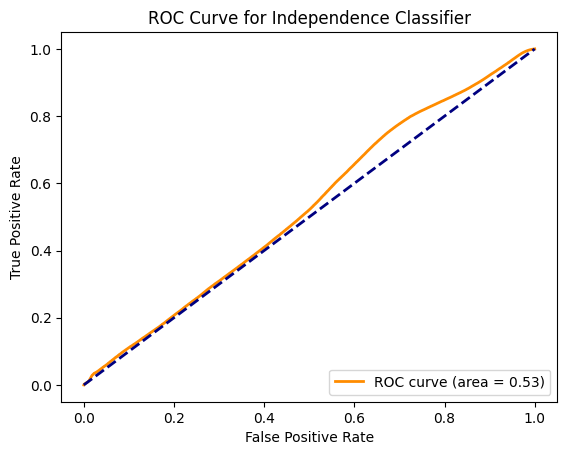

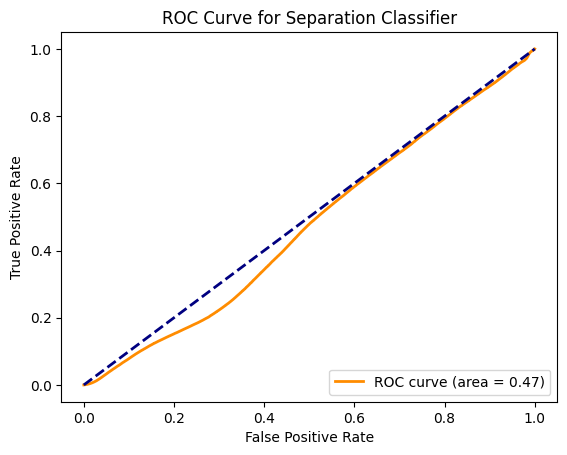

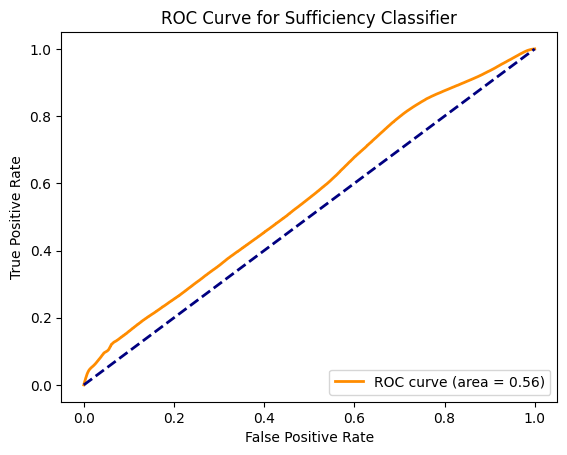

{'accuracy': 0.9363766035310627,
 'precision': 0.5804289544235925,
 'roc_auc': 0.8310328105662221,
 'confusion_matrix': array([[1214254,     626],
        [  81937,     866]], dtype=int64),
 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.94      1.00      0.97   1214880\n           1       0.58      0.01      0.02     82803\n\n    accuracy                           0.94   1297683\n   macro avg       0.76      0.50      0.49   1297683\nweighted avg       0.91      0.94      0.91   1297683\n',
 'roc_curve': {'fpr': [0.0,
   0.0,
   8.231265639404715e-07,
   8.231265639404715e-07,
   1.646253127880943e-06,
   1.646253127880943e-06,
   2.4693796918214146e-06,
   2.4693796918214146e-06,
   3.292506255761886e-06,
   3.292506255761886e-06,
   4.115632819702358e-06,
   4.115632819702358e-06,
   4.938759383642829e-06,
   4.938759383642829e-06,
   5.7618859475833006e-06,
   5.7618859475833006e-06,
   6.585012511523772e-06,
   6.58501251152

In [14]:
test_model(
    mitigator1,
    scaler1,
    features,
    target,
    sensitive_features,
    verbose=True,
    is_regression=False,
)

In [15]:
mitigator5, scaler5 = fit_adversarial_regressor(
    alpha=5,
    X_train=X_train,
    X_val=X_val,
    y_train=y_train,
    y_val=y_val,
    sensitive_train=sensitive_train,
    sensitive_val=sensitive_val,
    filename="models/alpha0.pkl",
    epochs=12,
    use_skip_connections=False,
    is_regression=False,
)

Epoch 1/12, Average adversary loss: 0.504941. Average predictor loss: 0.233481
Current alpha 5, learning_rate 0.001
Validation - Epoch 1/12, Adversary Loss: 5.095578, Predictor Loss: 1.700891
Epoch 2/12, Average adversary loss: 0.501922. Average predictor loss: 0.205210
Current alpha 5, learning_rate 0.001
Validation - Epoch 2/12, Adversary Loss: 5.048632, Predictor Loss: 1.574790
Epoch 3/12, Average adversary loss: 0.502239. Average predictor loss: 0.216388
Current alpha 5, learning_rate 0.001
Validation - Epoch 3/12, Adversary Loss: 5.031825, Predictor Loss: 1.609083
Epoch 4/12, Average adversary loss: 0.501850. Average predictor loss: 0.211894
Current alpha 5, learning_rate 0.001
Validation - Epoch 4/12, Adversary Loss: 4.994615, Predictor Loss: 1.601363
Epoch 5/12, Average adversary loss: 0.501543. Average predictor loss: 0.193968
Current alpha 5, learning_rate 0.001
Validation - Epoch 5/12, Adversary Loss: 4.988522, Predictor Loss: 1.525349
Epoch 6/12, Average adversary loss: 0.50

Prediction probabilities: [0.00764776 0.00698758 0.01380839 0.02363384 0.30265972]
Prediction labels: [0 0 0 0 0]
Accuracy: 0.9364
Precision: 0.5676
ROC AUC: 0.8288
Confusion Matrix:
[[1214017     863]
 [  81670    1133]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97   1214880
           1       0.57      0.01      0.03     82803

    accuracy                           0.94   1297683
   macro avg       0.75      0.51      0.50   1297683
weighted avg       0.91      0.94      0.91   1297683

{'mean_metrics': {'independence': 0.0058219097197980685, 'separation': 0.012062207847764956, 'sufficiency': 0.011215677805099963}, 'std_metrics': {'independence': 4.3085760948976985e-05, 'separation': 5.7655438137136905e-05, 'sufficiency': 6.414317357069877e-05}}


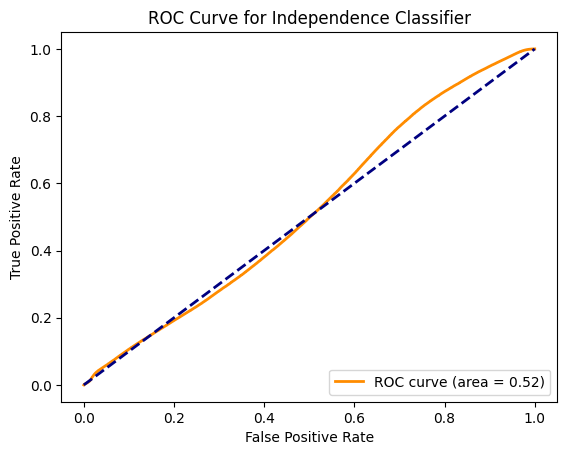

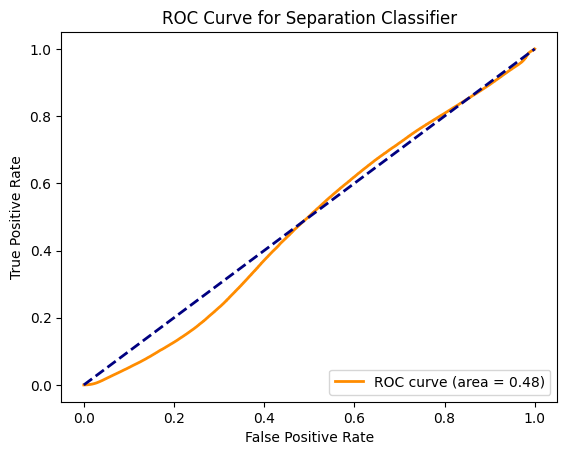

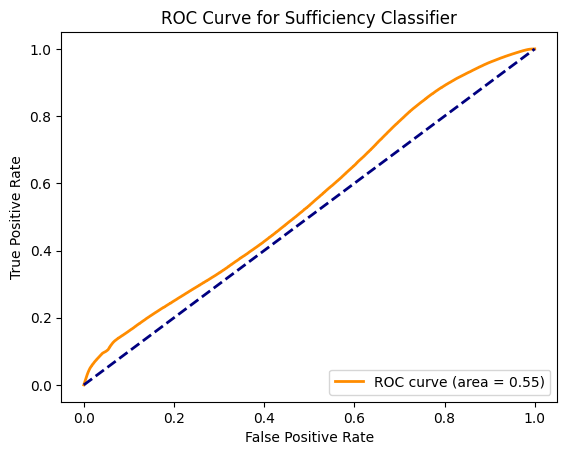

{'accuracy': 0.9363997216577546,
 'precision': 0.5676352705410822,
 'roc_auc': 0.8288486445419406,
 'confusion_matrix': array([[1214017,     863],
        [  81670,    1133]], dtype=int64),
 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.94      1.00      0.97   1214880\n           1       0.57      0.01      0.03     82803\n\n    accuracy                           0.94   1297683\n   macro avg       0.75      0.51      0.50   1297683\nweighted avg       0.91      0.94      0.91   1297683\n',
 'roc_curve': {'fpr': [0.0,
   0.0,
   1.646253127880943e-06,
   1.646253127880943e-06,
   3.292506255761886e-06,
   3.292506255761886e-06,
   4.938759383642829e-06,
   4.938759383642829e-06,
   5.7618859475833006e-06,
   5.7618859475833006e-06,
   8.231265639404716e-06,
   8.231265639404716e-06,
   9.054392203345186e-06,
   9.054392203345186e-06,
   1.3170025023047544e-05,
   1.3170025023047544e-05,
   1.4816278150928487e-05,
   1.4816278150

In [16]:
test_model(
    mitigator5,
    scaler5,
    features,
    target,
    sensitive_features,
    verbose=True,
    is_regression=False,
)